<a href="https://colab.research.google.com/github/shreyus3003/CMPE297_sec49/blob/master/Assignment_2/mixup_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U fastai

     |████████████████████████████████| 358kB 2.8MB/s 
     |████████████████████████████████| 40kB 5.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.4MB/s 
     |████████████████████████████████| 358kB 28.2MB/s 
     |████████████████████████████████| 51kB 10.2MB/s 
     |████████████████████████████████| 61kB 9.9MB/s 
     |████████████████████████████████| 1.0MB 31.4MB/s 
     |████████████████████████████████| 40kB 4.3MB/s 
     |████████████████████████████████| 40kB 7.7MB/s 
     |████████████████████████████████| 92kB 15.0MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 2.6MB 49.5MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
from fastai.vision.all import *
from fastai.data.all import *
from fastai import *


In [4]:
path = untar_data(URLs.CIFAR)

In [5]:
dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                    get_items=get_image_files,
                    get_y = parent_label,
                    item_tfms = Resize(460),
                    batch_tfms = aug_transforms(size=224, min_scale=0.75))
dls = dblock.dataloaders(path, bs=64)

## Baseline model.

In [5]:
model = xresnet50()
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.327296,1.613001,0.438500,10:42
1,0.917982,1.278023,0.591417,10:50
2,0.695895,0.663202,0.765917,10:50


## Test Time Augmentation

In [8]:
preds,targs = learn.tta()
accuracy(preds, targs).item()

0.7800833582878113

## Mixup

In [11]:
from fastai.vision.core import *

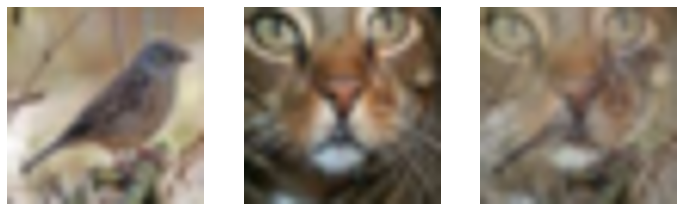

In [7]:
bird = PILImage.create(get_image_files_sorted(path/'train'/'bird')[0])
cat  = PILImage.create(get_image_files_sorted(path/'train'/'cat')[0])
bird = bird.resize((256,256))
cat = cat.resize((256,256))
tbird = tensor(bird).float() / 255.
tcat = tensor(cat).float() / 255.
_ , axs = plt.subplots(1,3, figsize=(12,4))
show_image(tbird, ax = axs[0]);
show_image(tcat, ax=axs[1]);
show_image((0.5*tbird + 0.5*tcat), ax=axs[2]);

In [4]:
mixup = MixUp(0.5)

In [5]:
# Mixup
model = xresnet50()
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy, cbs=mixup)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.763023,1.667952,0.395417,21:23
1,1.460154,1.013740,0.641917,21:14
2,1.310890,0.818680,0.726250,21:12


## Label smoothing

In [9]:
model = xresnet50()
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=accuracy)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.274953,2.892843,0.396250,11:32
1,1.856721,1.849936,0.682333,11:30
2,1.686698,1.662116,0.753167,11:31


In [ ]:
learn = Learner(data, models.resnet34()).show_tfms()